# Sine Series Activity

*An Introduction to series and recursion*

## The Taylor Series of sin(x)

The $\sin$ function can be evaluatied using it series representation, which you should be at least somewhat familiar with from calculus:
$$
\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \dots
$$


A simple approach to implementing this series as an algorithm is to sum the series up to the $N$th term:
$$
\sin x \approx \sum_{n=1}^N \frac{(-1)^{n-1} x^{2n-1}}{(2n - 1)!}
$$

However, there are some issues to consider with this 'direct' method:
- In theory, the series is infinite, how do we know when to stop the sum?
- The division of large terms is potentially dangerous leading to overflows
- Powers and factorials are computationally expensive!

### Building a better algorithm

To address the first bullet point, one can use a recursive algorithm. Recusion works by calculating series terms $a_n$ using previous the term $a_{n-1}$. This generally works well for series sums that converge to finite values. Specifically in the case of sine we can write the recursion relation as:

\begin{align}
a_n &= a_{n-1} \times q_n\\
a_n &= \frac{(-1)^{n-1} x^{2n-1}}{(2n - 1)!} = \frac{(-1)^{n-2} x^{2n-3}}{(2n - 3)!} \frac{-x^2}{(2n - 1)(2n - 2)}\\
a_n & = a_{n-1} \frac{-x^2}{(2n - 1)(2n - 2)}
\end{align}

Accuracy in this method can be approximately the last term in the sum, $a_N$. This approach is relative error rather than absolute (which is not straighforward), but it is sufficient for our purposes. Ideally, we should aim for error to be better than machine precision. 

## Activity

Create a function called `sin_recursive`. An outline is provided in the next cell, but you will need to add some code to complete it. The function should:
* Use the recursive approach discussed above 
* return the computed value of $\sin(x)$

Examine the behavior of the function by picking arguments to feed `sin_recursive` and plot the resulting error
* A function `relerror_sin` is provided to to help with this part
* Simply follow the instructions in the cells below and add code as needed

In [2]:
def sin_recursive(x, N=1000):
    """
    Calculate sin(x)
    x: argument of sin(x)
    N: nth term in expansion
    """
    prev_term = x #first order term
    term_sum = x
    
    for n in range(2,N):
        next_term = -prev_term * x**2 / ((2*n-1)*(2*n-2)) # a_n = - a_{n-1} x^2 / (2n-1)*(2n-2)

        term_sum += next_term  # add the new term and the last_term
        prev_term = next_term              # set the NEXT a_n from the current a_{n-1}
        
    return term_sum

sin_recursive(3.1416 / 3)

0.8660266281835431

In [3]:
def relerror_sin(N_values, x):
    """
    Calculate the relative error in our sin(x) function using the numpy sin(x) for comparison
    N_values: array of values of N to pass to sin_recursive
    x: argument of sin(x)
    """
    npsine = np.sin(x) #use numpy sine for comparison
    y = np.array([sin_recursive(x, N=N) for N in N_values]) #calculate sine for each arguement in the 'x' array
    diff = y - npsine #determine difference in values
    relative_error = np.abs(diff/npsine) #get relative error
    return relative_error

## Evaluation and plotting with single value

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Start by defining a value of x to test our function with (e.g., $x = \pi/3$, etc.)
Then perform a single percent error calculation for the function compared to the 
numpy implementaiton of $sin(x)$. Use the default $N$ value for this initial 
evaluation of sin_recursive(x)

In [5]:
testvalue = 2*np.pi

realvalue = np.sin(testvalue)
calcvalue = sin_recursive(testvalue)
pct_error = np.abs((realvalue - calcvalue) / (realvalue))
print("Percent error is: ", pct_error*100,"%")

Percent error is:  278.5243744706492 %


Now let's see how well the function converges for our test value for different values of N. 

In [6]:
N_values = np.arange(1, 1000)
r = relerror_sin(N_values, testvalue)

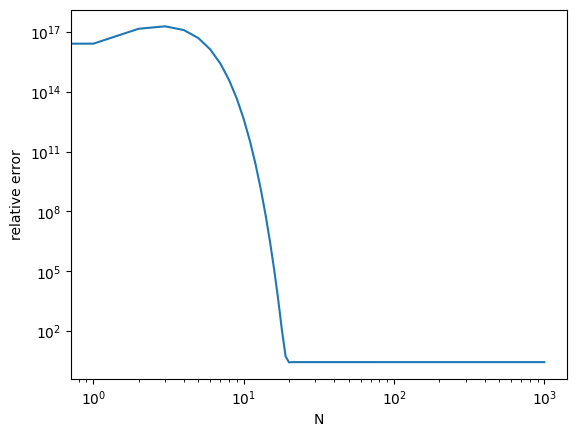

In [7]:
plt.figure()
plt.loglog(r)
plt.xlabel("N")
plt.ylabel("relative error")
plt.show()

## Evaluation and plotting with multiple values

Now, let's examine the function in a more systematic fashion. Define an array of x values that are multiples of $\pi$ (pick at least 4), and a list of N values (this is already done for you)

In [29]:
x_values = np.array([np.pi, 2*np.pi, 3*np.pi, 4*np.pi]) #add your code here
N_values = np.arange(1, 300)

Let's now run the relative error function to test the angle values. Create a plot below to examine the convergence. You can use the earlier plot code to assist with this part. But please add a legend to aid in differentiating the angle values. 

In [30]:
r_dict = {}
for i in range(len(x_values)):
    key = f"r{i+1}"
    r = relerror_sin(N_values, x_values[i])
    r_dict[key] = r

In [31]:
print(r_dict.keys())

dict_keys(['r1', 'r2', 'r3', 'r4'])


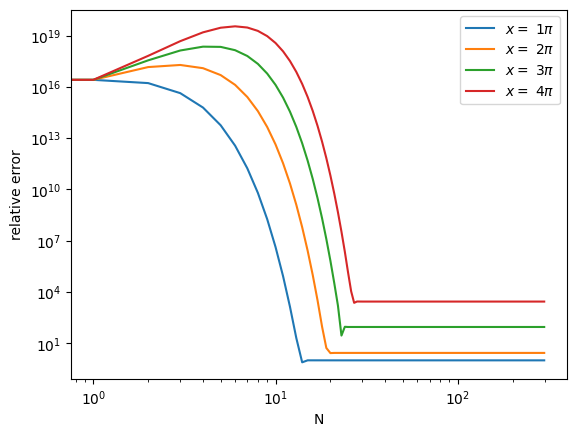

In [34]:
plt.figure()

for i in range(len(r_dict)):
    plt.loglog(r_dict[f"r{i+1}"], label=fr"$x =$ {x_values[i] / np.pi :0.0f}$\pi$")
plt.xlabel("N")
plt.ylabel("relative error")
plt.legend()

plt.show()

### Next Steps:
Add code cells below as needed to perform the following tasks:
* Feed a large range of x values to `recursive sine`. Use this to determine an inverval over which the algorithm converges and agrees well with the numpy sin(x) function
* Following from the first item, demonstrate that there is a range of x values  converges but it converges to an incorrect value (why is this?)
* Show that for large x, there is a regime where the algorithm does not converge

In [146]:
num_values = np.array([-2, -1.5, -1, -0.5, -0.25, -1e-3, 1e-3, 0.25, 0.5, 1, 1.5, 2])
x_values = num_values*np.pi
N_values = np.arange(1, 150)

In [147]:
r_dict = {}
for i in range(len(x_values)):
    key = f"r{i+1}"
    r = relerror_sin(N_values, x_values[i])
    r_dict[key] = r

C:\Users\Joseph\AppData\Local\Temp\ipykernel_11448\3446101062.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


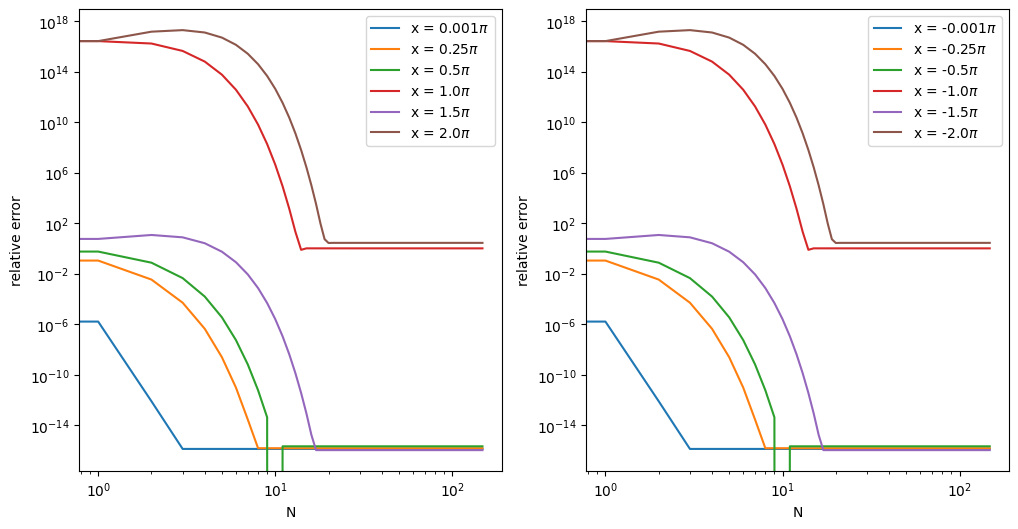

In [148]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

for i in range(6):
    j = i+6
    ax[0].loglog(r_dict[f"r{j+1}"], label=fr"x = {num_values[j]}$\pi$")
ax[0].set_xlabel("N")
ax[0].set_ylabel("relative error")
ax[0].legend()

i = 5
while i >= 0:
    ax[1].loglog(r_dict[f"r{i+1}"], label=fr"x = {num_values[i]}$\pi$")
    i -= 1
ax[1].set_xlabel("N")
ax[1].set_ylabel("relative error")
ax[1].legend()

fig.show()

We see that positive and negative values of $x$ have the exact same relative error. This is still too coarse-grained to pick out an exact interval of convergence though, so we will pick a new range of $x$ values (now positive only) and examine their convergence analytically rather than graphically. Since $|x| \in (0, \pi/2]$ seem to pretty obviously converge after ~$N=9$. So we'll start at $\pi/2$ and look deeper.

In [149]:
divisions = 8
i = divisions/2
fine_nums = np.array([])
while i <= divisions*10:
    fine_nums = np.append(fine_nums, i/divisions)
    i+=1

In [150]:
x_values = fine_nums * np.pi

In [163]:
def iterations_to_converge(x, error_tol = 1e-10, precision = 3) -> tuple[int, bool]:
    '''
    For a given x, check whether or not it converges according to our defined recursive sine function.
    
    Parameters
    ----------
    x : float
        Input parameter to the sine function
    error_tol : float
        Allowed error tolerance to check against error as computed by the relerror_sin function. Default is 1e-10
    precision : int
        Number of decimal places to show in print statements for fractions of pi
    
    Returns
    -------
    iterations : int
        The number of iterations until (a) error drops below set tolerance (convergance to correct value), 
        (b) error is above tolerance doesn't change for 10 iterations (convergence to incorrect value),
        or (c) error is above tolerance but not converged.
    converged_correctly : bool
        True if case (a), false if (b) or (c). That is, only true if for that x, recursive sine converged
        to the correct value of sin(x).
    '''
    r = relerror_sin(N_values, x)
    for i in range(len(r)):
        error = r[i]
        if error < error_tol:
            print(rf"x = {x/np.pi:0.{precision}f}π: Recursive sin converged to correct value after {i} iterations.")
            return i, True
        elif error == r[i-10]:
            print(rf"x = {x/np.pi:0.{precision}f}π: Recursive sin converged to INCORRECT value (or tolerance is too strict) after {i} iterations.")
            return i, False
    print(f"x = {x/np.pi:0.{precision}f}π: Recursive sin failed to converge after {len(r)} iterations.")
    return len(r), False


In [167]:
iterations_arr = np.array([])
correctly_conv_arr = np.array([])
for x in x_values:
    iterations, conv = iterations_to_converge(x, error_tol = 1e-4)
    iterations_arr = np.append(iterations_arr, iterations)
    correctly_conv_arr = np.append(correctly_conv_arr, conv)

x = 0.500π: Recursive sin converged to correct value after 5 iterations.
x = 0.625π: Recursive sin converged to correct value after 5 iterations.
x = 0.750π: Recursive sin converged to correct value after 6 iterations.
x = 0.875π: Recursive sin converged to correct value after 7 iterations.
x = 1.000π: Recursive sin converged to INCORRECT value (or tolerance is too strict) after 32 iterations.
x = 1.125π: Recursive sin converged to correct value after 8 iterations.
x = 1.250π: Recursive sin converged to correct value after 8 iterations.
x = 1.375π: Recursive sin converged to correct value after 9 iterations.
x = 1.500π: Recursive sin converged to correct value after 9 iterations.
x = 1.625π: Recursive sin converged to correct value after 10 iterations.
x = 1.750π: Recursive sin converged to correct value after 10 iterations.
x = 1.875π: Recursive sin converged to correct value after 11 iterations.
x = 2.000π: Recursive sin converged to INCORRECT value (or tolerance is too strict) after

So, what we see is that the recursive sine algorithm converges pretty well up to ~$5\pi$, aside from integer
multiples of $\pi$ where it seems to converge to the incorrect value. These are notably values where the true
value of $\sin(x) = 0$. As such, this "failure to converge" is likely due the inherent inaccuracy in the computational
implementation of the sine function, since ``np/sin(n*np.pi)`` (for integer $n$) doesn't return 0, but rather some number
on the order of $10^{-15}$ or $10^{-16}$. As such, defining the relative error with respect to that will almost always give quite large number, even if 1e-5 is realistically pretty close to 0.

In [171]:
print(np.sin(9*np.pi))

1.102182119232618e-15


In [184]:
big_nums = np.array([])
for i in range(25):
    big_nums = np.append(big_nums, i*2 + 0.3)
big_x_values = big_nums * np.pi

In [185]:
iterations_arr = np.array([])
correctly_conv_arr = np.array([])
for x in big_x_values:
    iterations, conv = iterations_to_converge(x, error_tol = 1e-5, precision = 1)
    iterations_arr = np.append(iterations_arr, iterations)
    correctly_conv_arr = np.append(correctly_conv_arr, conv)

x = 0.3π: Recursive sin converged to correct value after 4 iterations.
x = 2.3π: Recursive sin converged to correct value after 14 iterations.
x = 4.3π: Recursive sin converged to correct value after 22 iterations.
x = 6.3π: Recursive sin converged to correct value after 31 iterations.
x = 8.3π: Recursive sin converged to correct value after 39 iterations.
x = 10.3π: Recursive sin converged to INCORRECT value (or tolerance is too strict) after 69 iterations.
x = 12.3π: Recursive sin converged to INCORRECT value (or tolerance is too strict) after 77 iterations.
x = 14.3π: Recursive sin converged to INCORRECT value (or tolerance is too strict) after 85 iterations.
x = 16.3π: Recursive sin converged to INCORRECT value (or tolerance is too strict) after 91 iterations.
x = 18.3π: Recursive sin converged to INCORRECT value (or tolerance is too strict) after 96 iterations.
x = 20.3π: Recursive sin converged to INCORRECT value (or tolerance is too strict) after 102 iterations.
x = 22.3π: Recur

For $x > 10\pi$ or so, the algorithm fails even for noninteger multiples of $\pi$.